In [1]:
import warnings
warnings.simplefilter('ignore')

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# DATA

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

import numpy as np

max_features = 10000
maxlen = 500
batch_size = 32

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)

np.load = np_load_old

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

Using TensorFlow backend.


# Long Short-Term Memory

In [3]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])



history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.4995 - acc: 0.7661 - val_loss: 0.3304 - val_acc: 0.8676
Epoch 2/10
20000/20000 [==============================] - 50s 2ms/step - loss: 0.2898 - acc: 0.8859 - val_loss: 0.3043 - val_acc: 0.8684
Epoch 3/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.2364 - acc: 0.9102 - val_loss: 0.3079 - val_acc: 0.8808
Epoch 4/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.2016 - acc: 0.9240 - val_loss: 0.3066 - val_acc: 0.8818
Epoch 5/10
20000/20000 [==============================] - 99s 5ms/step - loss: 0.1754 - acc: 0.9363 - val_loss: 0.2970 - val_acc: 0.8868
Epoch 6/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.1597 - acc: 0.9422 - val_loss: 0.2961 - val_acc: 0.8804
Epoch 7/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1423 - acc: 0.9494 - val_loss: 0.4359 - val_acc:

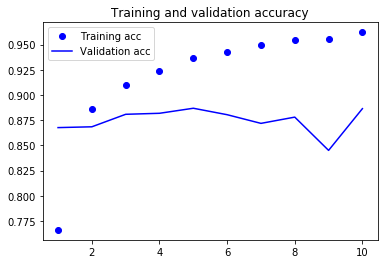

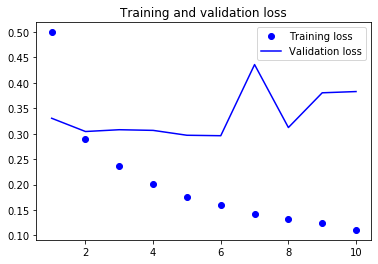

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline



acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show();